
### Human Activity Recognition V1

January 27, 2021


### Introduction
* Dataset: WISDM (WISDM_ar_v1.1_raw)
* Encoding: Accuracy Color Channel
* Model: CNN



### Load the dataset

Before we get the data and start exploring it, let's download all the dependencies that we will need.


In [ ]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

import mlxtend # library to plot the confusion matrix
!pip install mlxtend --upgrade --no-deps

print('Libraries imported.')

Requirement already up-to-date: mlxtend in /usr/local/lib/python3.6/dist-packages (0.18.0)
Libraries imported.


Main features of the dataset WISDM:
* Number of examples: 1,098,207
* Number of attributes: 6
* Class Distribution
  * Walking: 424,400 (38.6%)
  * Jogging: 342,177 (31.2%)
  * Upstairs: 122,869 (11.2%)
  * Downstairs: 100,427 (9.1%)
  * Sitting: 59,939 (5.5%)
  * Standing: 48,395 (4.4%)



The code below has to be used to load the dataset and then commented. Due to some irregularities in the dataset, when it's load the notebook becomes slow. Work with the preprocessed dataset instead.


In [ ]:
# path = '/content/drive/MyDrive/Python/Redes Neuronales Convolucionales/Human Activity Recognition/CNN V1/dataset/WISDM_ar_v1.1_raw.txt'
# data_raw = pd.read_csv(path,                        # dataset's path
#                        header = None,               # raw dataset has no headers
#                        lineterminator = ";",        # the final column ends with ";"
#                        engine = "c",                # Parser engine "c" is faster than python parser engine
#                        error_bad_lines = False      # irregularities in the dataset like the numbers of columns not match
#                        )
# data_raw.head()

The preprocessed dataset

In [ ]:
data_har = data_raw.copy()
data_har.drop([0, 2], axis = 1, inplace = True)
data_har.columns = ['Activity', 'Ax', 'Ay', 'Az']
data_har.head()
data_har.dropna(axis = 0, how = 'any', inplace = True)
data_har.reset_index(drop = True, inplace = True)
print('Rows: {}'.format(data_har.shape[0]))
print('Columns: {}'.format(data_har.shape[1]))
data_har.head()

Rows: 1086474
Columns: 4


,Activity,Ax,Ay,Az
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


Print the datatype of all columns

In [ ]:
for column in data_har.columns:
    print('{} --> {}'.format(column, data_har[column].dtype))

Activity --> object
Ax --> float64
Ay --> float64
Az --> float64


### Visualizing Data

Amount of activities

In [ ]:
data_har['Activity'].value_counts()

Walking       418394
Jogging       336450
Upstairs      122869
Downstairs    100427
Sitting        59939
Standing       48395
Name: Activity, dtype: int64

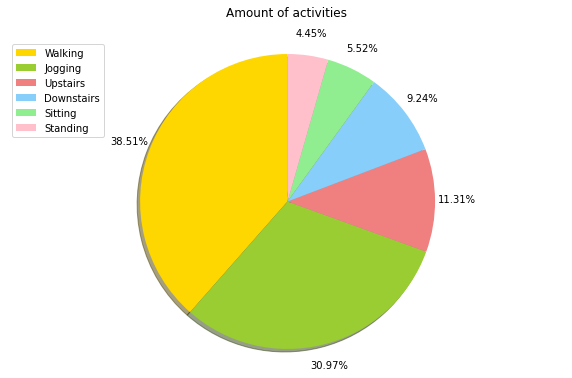

In [ ]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0, 0, 0, 0, 0, 0] # ratio for each continent with which to offset each wedge.
labels = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
sizes = []
for size in data_har['Activity'].value_counts():
  sizes.append(size)

fig, ax = plt.subplots(figsize =(10,6))
ax.pie(sizes,
      autopct = '%1.2f%%', 
      startangle = 90,    
      shadow = True,       
      labels = None,         # turn off labels on pie chart
      pctdistance = 1.15,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
      colors = colors_list,  # add custom colors
      explode = explode_list # 'explode' lowest 3 continents
)

# scale the title up by 12% to match pctdistance
plt.title('Amount of activities', y = 1.05) 
plt.axis('equal') 

# add legend
plt.legend(labels = labels, loc = 'upper left') 
plt.show()

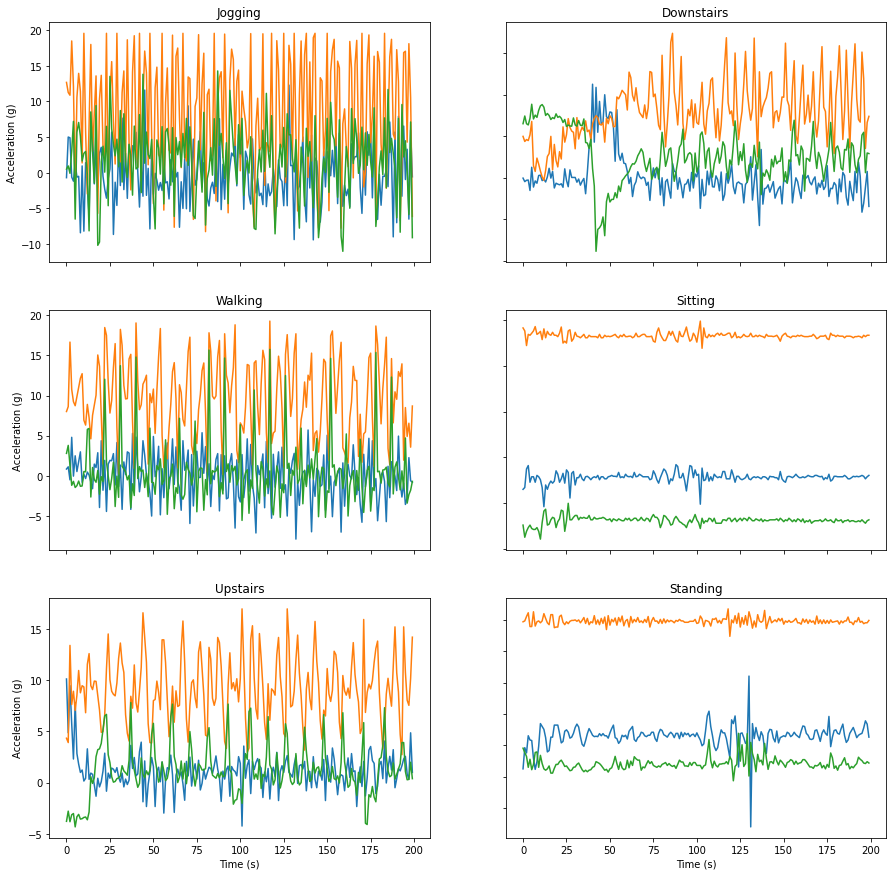

In [129]:
ts = 4  # time to plot
fig, axs = plt.subplots(3, 2, figsize = (15,15))
row = 0
column = 0

for index, activity in enumerate(data_har['Activity'].unique()):
  data_plot = data_har[data_har['Activity'] == activity][:50*ts]
  data_time = np.arange(0,50*ts)
  axs[row,column].plot(data_time, data_plot['Ax'],
                       data_time, data_plot['Ay'],
                       data_time, data_plot['Az'])
  axs[row,column].set_title(activity)

  if (index == 2): column, row   = 1,0
  else: row = row + 1

for ax in axs.flat: ax.set(xlabel='Time (s)', ylabel='Acceleration (g)')
# Hide x labels and tick labels for top plots and y ticks for right plots
for ax in axs.flat: ax.label_outer()

Let's balance dataset based on the less number of samples of each activity

In [134]:
min_samples = data_har['Activity'].value_counts().min()

data_bhar = []
for data_ in data_har['Activity'].unique():
  data_bhar.append(data_har[data_har['Activity'] == activity].head(min_samples).copy())